In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df4=pd.read_excel('Final1.xlsx')
df4

,city,ft,bt,oem,transmission,Insurance Validity,Ownership,Color,km,model,Engine Displacement,Mileage,price,Seating Capacity,Vehicle_Age
0,Chennai,Petrol,SUV,Kia,Automatic,Third Party insurance,First Owner,Black,20000.0,Kia Sonet,998,26.35,11.50,5,2
1,Chennai,Petrol,Minivans,Maruti,Manual,Comprehensive,First Owner,Grey,20687.0,Maruti Eeco,1196,15.37,4.15,7,9
2,Chennai,Petrol,SUV,Nissan,Manual,Third Party insurance,First Owner,Others,30000.0,Nissan Magnite,999,20.00,7.50,5,3
3,Chennai,Petrol,Hatchback,Hyundai,Manual,Comprehensive,First Owner,Silver,59247.0,Hyundai i10,1086,19.81,3.98,5,9
4,Chennai,Petrol,Hatchback,Honda,Manual,Third Party insurance,First Owner,Others,50000.0,Honda Jazz,1199,18.70,5.50,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,Kolkata,Petrol,Hatchback,Maruti,Manual,Third Party insurance,First Owner,Others,10000.0,Maruti Celerio,998,25.24,5.10,5,2
6616,Kolkata,Petrol,Hatchback,Maruti,Manual,Third Party insurance,First Owner,Others,120000.0,Maruti Alto 800,796,22.74,1.80,5,10
6617,Kolkata,Petrol,Sedan,Mercedes-Benz,Automatic,Third Party insurance,Third Owner,Others,50000.0,Mercedes-Benz C-Class,1796,11.74,5.50,5,13
6618,Kolkata,Petrol,Hatchback,Maruti,Manual,Third Party insurance,First Owner,Others,40000.0,Maruti Ritz,1197,18.50,1.40,5,12


In [47]:
df4['Insurance Validity'].value_counts()

Insurance Validity
Third Party insurance    3157
Comprehensive            2410
Third Party               582
Zero Dep                  280
Not Available             187
One Year                    3
Two year                    1
Name: count, dtype: int64

In [ ]:
#for target encoding
df4["Body_Type"] = df4.groupby("bt")["price"].transform("mean").round(2)
df4["Car_Color"] = df4.groupby("Color")["price"].transform("mean").round(2)
df4["Car_Brand"] = df4.groupby("oem")["price"].transform("mean").round(2)
df4["Car_Model"]=df4.groupby("model")["price"].transform("mean").round(2)
df4['City'] = df4.groupby("model")["price"].transform("mean").round(2)
df4['Insurance Validity'] = df4.groupby("Insurance Validity")["price"].transform("mean").round(2)
df4['Ownership'] = df4.groupby("Ownership")["price"].transform("mean").round(2)



In [55]:
df4.drop(columns=['bt','oem','Color','model'],inplace=True)

In [56]:
df4

,city,ft,transmission,Insurance Validity,Ownership,km,Engine Displacement,Mileage,price,Seating Capacity,Vehicle_Age,Body_Type,Car_Color,Car_Brand,Car_Model,City
0,Chennai,Petrol,Automatic,5.89,6.74,20000.0,998,26.35,11.50,5,2,9.96,8.59,13.69,11.23,11.23
1,Chennai,Petrol,Manual,6.53,6.74,20687.0,1196,15.37,4.15,7,9,3.68,6.16,5.10,4.01,4.01
2,Chennai,Petrol,Manual,5.89,6.74,30000.0,999,20.00,7.50,5,3,9.96,5.54,5.79,7.73,7.73
3,Chennai,Petrol,Manual,6.53,6.74,59247.0,1086,19.81,3.98,5,9,4.49,5.57,5.99,2.52,2.52
4,Chennai,Petrol,Manual,5.89,6.74,50000.0,1199,18.70,5.50,5,9,4.49,5.54,6.25,5.80,5.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,Kolkata,Petrol,Manual,5.89,6.74,10000.0,998,25.24,5.10,5,2,4.49,5.54,5.10,4.37,4.37
6616,Kolkata,Petrol,Manual,5.89,6.74,120000.0,796,22.74,1.80,5,10,4.49,5.54,5.10,3.03,3.03
6617,Kolkata,Petrol,Automatic,5.89,3.46,50000.0,1796,11.74,5.50,5,13,6.38,5.54,24.46,22.82,22.82
6618,Kolkata,Petrol,Manual,5.89,6.74,40000.0,1197,18.50,1.40,5,12,4.49,5.54,5.10,2.66,2.66


In [ ]:
#Scaling the numerical Columns
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['Engine Displacement', 'Mileage', 'Vehicle_Age','km','Seating Capacity']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df4[columns_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=columns_to_scale)
print(scaled_df)

      Engine Displacement   Mileage  Vehicle_Age        km  Seating Capacity
0               -1.172937  2.210625    -1.505732 -1.055446         -0.210255
1               -0.253019 -1.569507     0.468789 -1.035548          4.787541
2               -1.168291  0.024483    -1.223657 -0.765809         -0.210255
3               -0.764085 -0.040929     0.468789  0.081292         -0.210255
4               -0.239081 -0.423074     0.468789 -0.186535         -0.210255
...                   ...       ...          ...       ...               ...
6615            -1.172937  1.828480    -1.505732 -1.345083         -0.210255
6616            -2.111438  0.967794     0.750863  1.840923         -0.210255
6617             2.534609 -2.819222     1.597086 -0.186535         -0.210255
6618            -0.248373 -0.491928     1.315012 -0.476172         -0.210255
6619             0.978183 -0.071914    -0.095360  1.840923         -0.210255

[6620 rows x 5 columns]


In [ ]:
#One hot encoder for Transmission Column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse_output=False) 
encoded_array = encoder.fit_transform(df4[['transmission']]) 
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['transmission']))
encoded_df




,transmission_Manual
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6615,1.0
6616,1.0
6617,0.0
6618,1.0


In [59]:
df4.drop(columns=['city','ft','transmission'],inplace=True)

In [60]:
df4

,Insurance Validity,Ownership,km,Engine Displacement,Mileage,price,Seating Capacity,Vehicle_Age,Body_Type,Car_Color,Car_Brand,Car_Model,City
0,5.89,6.74,20000.0,998,26.35,11.50,5,2,9.96,8.59,13.69,11.23,11.23
1,6.53,6.74,20687.0,1196,15.37,4.15,7,9,3.68,6.16,5.10,4.01,4.01
2,5.89,6.74,30000.0,999,20.00,7.50,5,3,9.96,5.54,5.79,7.73,7.73
3,6.53,6.74,59247.0,1086,19.81,3.98,5,9,4.49,5.57,5.99,2.52,2.52
4,5.89,6.74,50000.0,1199,18.70,5.50,5,9,4.49,5.54,6.25,5.80,5.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,5.89,6.74,10000.0,998,25.24,5.10,5,2,4.49,5.54,5.10,4.37,4.37
6616,5.89,6.74,120000.0,796,22.74,1.80,5,10,4.49,5.54,5.10,3.03,3.03
6617,5.89,3.46,50000.0,1796,11.74,5.50,5,13,6.38,5.54,24.46,22.82,22.82
6618,5.89,6.74,40000.0,1197,18.50,1.40,5,12,4.49,5.54,5.10,2.66,2.66


select_df=pd.concat[df4['Body_Type','Car_Color','Car_Brand','Car_Model','City','Insurance Validity','Ownership'],encoded_df,scaled_df]

In [ ]:
#To get in a single df
select_df=pd.concat([df4[['Body_Type','Car_Color','Car_Brand','Car_Model','price','Insurance Validity','Ownership','City']],encoded_df,scaled_df],axis=1)
select_df

,Body_Type,Car_Color,Car_Brand,Car_Model,price,Insurance Validity,Ownership,City,transmission_Manual,Engine Displacement,Mileage,Vehicle_Age,km,Seating Capacity
0,9.96,8.59,13.69,11.23,11.50,5.89,6.74,11.23,0.0,-1.172937,2.210625,-1.505732,-1.055446,-0.210255
1,3.68,6.16,5.10,4.01,4.15,6.53,6.74,4.01,1.0,-0.253019,-1.569507,0.468789,-1.035548,4.787541
2,9.96,5.54,5.79,7.73,7.50,5.89,6.74,7.73,1.0,-1.168291,0.024483,-1.223657,-0.765809,-0.210255
3,4.49,5.57,5.99,2.52,3.98,6.53,6.74,2.52,1.0,-0.764085,-0.040929,0.468789,0.081292,-0.210255
4,4.49,5.54,6.25,5.80,5.50,5.89,6.74,5.80,1.0,-0.239081,-0.423074,0.468789,-0.186535,-0.210255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,4.49,5.54,5.10,4.37,5.10,5.89,6.74,4.37,1.0,-1.172937,1.828480,-1.505732,-1.345083,-0.210255
6616,4.49,5.54,5.10,3.03,1.80,5.89,6.74,3.03,1.0,-2.111438,0.967794,0.750863,1.840923,-0.210255
6617,6.38,5.54,24.46,22.82,5.50,5.89,3.46,22.82,0.0,2.534609,-2.819222,1.597086,-0.186535,-0.210255
6618,4.49,5.54,5.10,2.66,1.40,5.89,6.74,2.66,1.0,-0.248373,-0.491928,1.315012,-0.476172,-0.210255


In [140]:
select_df

,Body_Type,Car_Color,Car_Brand,price,Insurance Validity,Ownership,City,transmission_Manual,Engine Displacement,Mileage,Vehicle_Age,km,Seating Capacity
0,9.96,8.59,13.69,11.50,5.89,6.74,11.23,0.0,-1.172937,2.210625,-1.505732,-1.055446,-0.210255
1,3.68,6.16,5.10,4.15,6.53,6.74,4.01,1.0,-0.253019,-1.569507,0.468789,-1.035548,4.787541
2,9.96,5.54,5.79,7.50,5.89,6.74,7.73,1.0,-1.168291,0.024483,-1.223657,-0.765809,-0.210255
3,4.49,5.57,5.99,3.98,6.53,6.74,2.52,1.0,-0.764085,-0.040929,0.468789,0.081292,-0.210255
4,4.49,5.54,6.25,5.50,5.89,6.74,5.80,1.0,-0.239081,-0.423074,0.468789,-0.186535,-0.210255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,4.49,5.54,5.10,5.10,5.89,6.74,4.37,1.0,-1.172937,1.828480,-1.505732,-1.345083,-0.210255
6616,4.49,5.54,5.10,1.80,5.89,6.74,3.03,1.0,-2.111438,0.967794,0.750863,1.840923,-0.210255
6617,6.38,5.54,24.46,5.50,5.89,3.46,22.82,0.0,2.534609,-2.819222,1.597086,-0.186535,-0.210255
6618,4.49,5.54,5.10,1.40,5.89,6.74,2.66,1.0,-0.248373,-0.491928,1.315012,-0.476172,-0.210255


In [ ]:
#checking Multicollinearity among independent variables
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Prepare data for VIF calculation
X = select_df.drop(columns=['price'])
X = sm.add_constant(X)  # Add a constant (intercept) for VIF calculation

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                feature         VIF
0                 const  351.695172
1             Body_Type    2.095601
2             Car_Color    1.080249
3             Car_Brand    2.307684
4             Car_Model         inf
5    Insurance Validity    1.057334
6             Ownership    1.160710
7                  City         inf
8   transmission_Manual    1.156901
9   Engine Displacement    1.587327
10              Mileage    1.399065
11          Vehicle_Age    2.036237
12                   km    1.478894
13     Seating Capacity    1.063626


c:\Users\Dharshinee R\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
#Checking Multicollinaerity after dropping car_model column
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Prepare data for VIF calculation
X = select_df.drop(columns=['price','Car_Model'])
X = sm.add_constant(X)  # Add a constant (intercept) for VIF calculation

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                feature         VIF
0                 const  351.695172
1             Body_Type    2.095601
2             Car_Color    1.080249
3             Car_Brand    2.307684
4    Insurance Validity    1.057334
5             Ownership    1.160710
6                  City    4.190777
7   transmission_Manual    1.156901
8   Engine Displacement    1.587327
9               Mileage    1.399065
10          Vehicle_Age    2.036237
11                   km    1.478894
12     Seating Capacity    1.063626


In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Example DataFrame (assume df is your prepared DataFrame)
select_df = select_df.drop(columns=['Car_Model'])  # Dropping Car_Model

# Define features and target
X = select_df.drop(columns=['price'])
y = select_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.1138133426543917
R-squared: 0.9237977911453749


In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Define features and target
X = select_df.drop(columns=['price'])
y = select_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.1103990983879133
R-squared: 0.924031378717647


Using various ml models and feature selection models to check the best of both

In [75]:


# Split the data into training and testing sets
X = select_df.drop(columns=['price'])
y = select_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Recursive Feature Elimination (RFE) with Linear Regression
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# 2. SelectKBest with f_regression
kbest = SelectKBest(score_func=f_regression, k=2)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

# 3. Lasso for feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_features = X.columns[lasso.coef_ != 0]
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]

# 4. Feature importance from Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = importances.argsort()[-2:]  # Select top 2 features
X_train_rf = X_train.iloc[:, indices]
X_test_rf = X_test.iloc[:, indices]


In [76]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gbr":GradientBoostingRegressor(),
    "ridge":Ridge(alpha=1.0),
    "dt":DecisionTreeRegressor()
}

# Evaluate models with different feature sets
results = []

for model_name, model in models.items():
    for method_name, (X_tr, X_te) in {
        "RFE": (X_train_rfe, X_test_rfe),
        "SelectKBest": (X_train_kbest, X_test_kbest),
        "Lasso": (X_train_lasso, X_test_lasso),
        "Random Forest Importance": (X_train_rf, X_test_rf)
    }.items():
        mse, r2 = evaluate_model(model, X_tr, X_te, y_train, y_test)
        results.append({
            "Model": model_name,
            "Feature Selection": method_name,
            "MSE": mse,
            "R-squared": r2
        })

results_df = pd.DataFrame(results)
print(results_df)


                Model         Feature Selection       MSE  R-squared
0   Linear Regression                       RFE  7.721088   0.471757
1   Linear Regression               SelectKBest  2.243304   0.846523
2   Linear Regression                     Lasso  1.930407   0.867930
3   Linear Regression  Random Forest Importance  2.243304   0.846523
4       Random Forest                       RFE  7.584257   0.481119
5       Random Forest               SelectKBest  1.537385   0.894819
6       Random Forest                     Lasso  1.140191   0.921993
7       Random Forest  Random Forest Importance  1.550621   0.893913
8                 Gbr                       RFE  7.546267   0.483718
9                 Gbr               SelectKBest  2.005680   0.862780
10                Gbr                     Lasso  1.163325   0.920410
11                Gbr  Random Forest Importance  2.005680   0.862780
12              ridge                       RFE  7.721197   0.471750
13              ridge             

In [ ]:
#Lasso feature Selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_features = X.columns[lasso.coef_ != 0]
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]
print(selected_features)

Index(['Car_Color', 'Car_Brand', 'Ownership', 'City', 'transmission_Manual',
       'Engine Displacement', 'Vehicle_Age', 'km'],
      dtype='object')


In [142]:
# Create a DataFrame with selected features
X_selected = X[selected_features]

# Add the target variable to the DataFrame
feature_df= pd.concat([X_selected, y], axis=1)

# Save the DataFrame to a CSV file
feature_df.to_csv('selected_features1.csv', index=False)

In [144]:
feature_df

,Car_Color,Car_Brand,Ownership,City,transmission_Manual,Engine Displacement,Vehicle_Age,km,price
0,8.59,13.69,6.74,11.23,0.0,-1.172937,-1.505732,-1.055446,11.50
1,6.16,5.10,6.74,4.01,1.0,-0.253019,0.468789,-1.035548,4.15
2,5.54,5.79,6.74,7.73,1.0,-1.168291,-1.223657,-0.765809,7.50
3,5.57,5.99,6.74,2.52,1.0,-0.764085,0.468789,0.081292,3.98
4,5.54,6.25,6.74,5.80,1.0,-0.239081,0.468789,-0.186535,5.50
...,...,...,...,...,...,...,...,...,...
6615,5.54,5.10,6.74,4.37,1.0,-1.172937,-1.505732,-1.345083,5.10
6616,5.54,5.10,6.74,3.03,1.0,-2.111438,0.750863,1.840923,1.80
6617,5.54,24.46,3.46,22.82,0.0,2.534609,1.597086,-0.186535,5.50
6618,5.54,5.10,6.74,2.66,1.0,-0.248373,1.315012,-0.476172,1.40


In [158]:
feature_df.isnull().sum()

Car_Color              0
Car_Brand              0
Ownership              0
City                   0
transmission_Manual    0
Engine Displacement    0
Vehicle_Age            0
km                     0
price                  0
dtype: int64

In [145]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Prepare data for VIF calculation
X = feature_df.drop(columns=['price'])
X = sm.add_constant(X)  # Add a constant (intercept) for VIF calculation

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

               feature        VIF
0                const  98.109675
1            Car_Color   1.064318
2            Car_Brand   2.133614
3            Ownership   1.149900
4                 City   3.203896
5  transmission_Manual   1.125937
6  Engine Displacement   1.437096
7          Vehicle_Age   1.902717
8                   km   1.392383


In [ ]:
#taking X and y for models
X = feature_df.drop(columns=['price'])
y = feature_df['price']

1)Linear Regression

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
regr=LinearRegression()
regr.fit(X_train,y_train)
regr.score(X_test,y_test)



0.8420981714090161

In [148]:
y_pred = regr.predict(X_test)

# Calculate evaluation metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")


Mean Squared Error (MSE): 1.9071910742730447
Root Mean Squared Error (RMSE): 1.381010888542536
R-Squared (R2): 0.8420981714090161


In [ ]:
2)Decision Tree

In [149]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate evaluation metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")


Mean Squared Error (MSE): 2.42614372141999
Root Mean Squared Error (RMSE): 1.5576083337668651
R-Squared (R2): 0.839579477530367


In [ ]:
3)Ridge Regression

In [150]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Initialize the Ridge regression model with a regularization parameter (alpha)
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)
print(ridge_model.score(X_test, y_test))

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f'Ridge Mean Squared Error: {mse_ridge:.2f}')
print(f'Ridge R-squared: {r2_ridge:.2f}')
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")



0.7814301461510608
Ridge Mean Squared Error: 3.28
Ridge R-squared: 0.78
Root Mean Squared Error (RMSE): 1.81


4)Random Forest Regressor

In [151]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor( random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mse_rf)

print(f'Random Forest Mean Squared Error: {mse_rf:.2f}')
print(f'Random Forest R-squared: {r2_rf:.2f}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Random Forest Mean Squared Error: 1.41
Random Forest R-squared: 0.91
Root Mean Squared Error (RMSE): 1.19


5)Gradient Boosting

In [154]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

gbr = GradientBoostingRegressor( random_state=42)
gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)  # Correct variable for MSE
r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print(f' Mean Squared Error: {mse_gbr:.2f}')
print(f' R-squared: {r2_gbr:.2f}')
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")

 Mean Squared Error: 1.28
 R-squared: 0.91
Root Mean Squared Error (RMSE): 1.13


K fold cross Validation

In [191]:


from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score




gbr = GradientBoostingRegressor( random_state=42)

# Repeated k-fold cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_val_score(rf, X, y, cv=rkf, scoring='neg_mean_squared_error')
r2_scorer = make_scorer(r2_score)
# Calculate average and standard deviation of MSE

average_mse = np.mean(-scores)
rmse_scores = np.sqrt(-scores)
average_rmse = np.mean(rmse_scores)

r2_scores = cross_val_score(rf, X, y, cv=rkf, scoring=r2_scorer) 
average_r2 = np.mean(r2_scores) 


print(f'Average Mean Squared Error (MSE): {average_mse:.2f}') 
print(f'Average R-squared: {average_r2:.2f}') 
print(f'Average Root Mean Squared Error (RMSE): {average_rmse:.2f}') 


Average Mean Squared Error (MSE): 1.54
Average R-squared: 0.90
Average Root Mean Squared Error (RMSE): 1.23


Hyperparameter Tuning

In [192]:
from sklearn.model_selection import  GridSearchCV
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Regressor model
gbr = GradientBoostingRegressor( random_state=42)

# Define the hyperparameter grid
param_grid = {
     'n_estimators': [50, 100, 200],
     'learning_rate': [0.01, 0.1, 0.2], 
     'max_depth': [3, 4, 5] 
}
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Train the model and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
# Train the model with the best hyperparameters
best_model1 = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model1.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-Squared (R²): {r2:.3f}")



Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error (MSE): 1.100
Root Mean Squared Error (RMSE): 1.049
R-Squared (R²): 0.925


Feature Importance

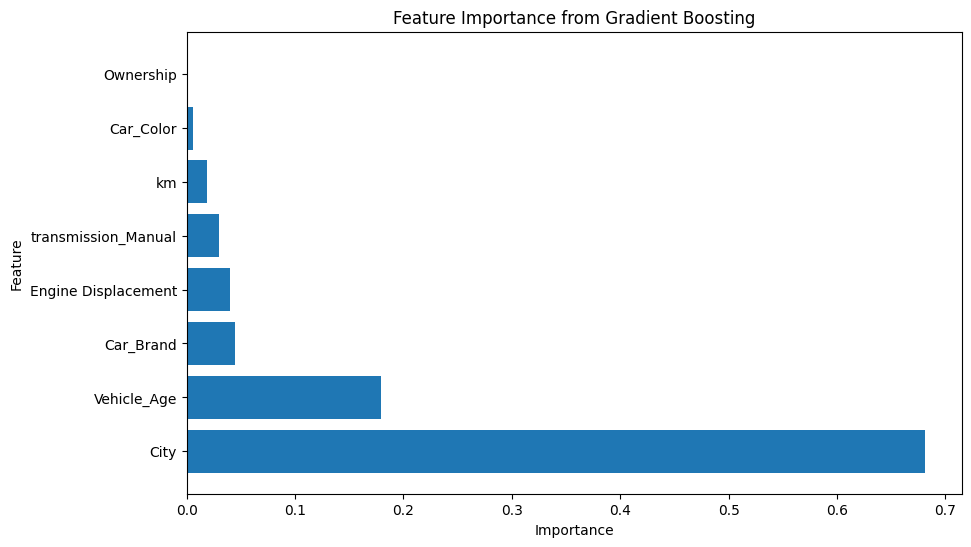

               Feature  Importance
3                 City    0.680928
6          Vehicle_Age    0.179366
1            Car_Brand    0.044400
5  Engine Displacement    0.039812
4  transmission_Manual    0.029843
7                   km    0.018879
0            Car_Color    0.005856
2            Ownership    0.000917


In [ ]:



best_model1 = grid_search.best_estimator_

# Get the feature importances
feature_importances = best_model1.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_names = X_train.columns 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Gradient Boosting')
plt.show()

# Optionally, print out the feature importances in a tabular format
print(importance_df)



In [ ]:
# Concatenate into single df
columns_to_select = ['Car_Brand','Vehicle_Age','transmission_Manual','Engine Displacement','City','price','km','Car_Color','Ownership'] 
new_df = feature_df[columns_to_select]
new_df

,Car_Brand,Vehicle_Age,transmission_Manual,Engine Displacement,City,price,km,Car_Color,Ownership
0,13.69,-1.505732,0.0,-1.172937,11.23,11.50,-1.055446,8.59,6.74
1,5.10,0.468789,1.0,-0.253019,4.01,4.15,-1.035548,6.16,6.74
2,5.79,-1.223657,1.0,-1.168291,7.73,7.50,-0.765809,5.54,6.74
3,5.99,0.468789,1.0,-0.764085,2.52,3.98,0.081292,5.57,6.74
4,6.25,0.468789,1.0,-0.239081,5.80,5.50,-0.186535,5.54,6.74
...,...,...,...,...,...,...,...,...,...
6615,5.10,-1.505732,1.0,-1.172937,4.37,5.10,-1.345083,5.54,6.74
6616,5.10,0.750863,1.0,-2.111438,3.03,1.80,1.840923,5.54,6.74
6617,24.46,1.597086,0.0,2.534609,22.82,5.50,-0.186535,5.54,3.46
6618,5.10,1.315012,1.0,-0.248373,2.66,1.40,-0.476172,5.54,6.74


In [200]:
new_df.to_excel('new.xlsx',index=False)

In [195]:
import pickle
with open('features3.pkl', 'wb') as f:
    pickle.dump(new_df, f)

To check after hyperparameter tuning 

In [196]:
X=new_df.drop(columns=['price'])
y=new_df['price']

In [197]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

gbr1 = GradientBoostingRegressor( learning_rate= 0.2, max_depth= 3, n_estimators= 200,random_state=42)
gbr1.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr1.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)  # Correct variable for MSE
r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print(f' Mean Squared Error: {mse_gbr:.2f}')
print(f' R-squared: {r2_gbr:.2f}')
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")

 Mean Squared Error: 1.34
 R-squared: 0.92
Root Mean Squared Error (RMSE): 1.16


In [ ]:
#convert them into a pickle file
import pickle
with open('gbr2.pkl', 'wb') as f:
    pickle.dump(gbr1, f)